In [1]:
# imports
import os
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

# read dataset
file_path = os.path.realpath('../project/assets/iris_clean.csv')
iris = pd.read_csv(file_path)

iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [2]:
# creating a new column, score, of numbers corresponding to each species
iris["score"], _ = iris["species"].factorize()

iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species,score
0,5.1,3.5,1.4,0.2,setosa,0
1,4.9,3.0,1.4,0.2,setosa,0
2,4.7,3.2,1.3,0.2,setosa,0
3,4.6,3.1,1.5,0.2,setosa,0
4,5.0,3.6,1.4,0.2,setosa,0


In [3]:
def Classification():
    # separate data into training and test data, splitting at 80:20 train:test ratio (test_size = 0.2)
    train , test = train_test_split(iris, test_size = 0.2) # random_state can be used to select a random seed for repeatable results

    # seperate training and test data into x and y
    train_X = train[["petal_length", "petal_width", "sepal_length", "sepal_width"]] # all columns except for species and score
    train_y = train["score"] # only score

    test_X = test[["petal_length", "petal_width", "sepal_length", "sepal_width"]] # all columns except for species and score
    test_y = test["score"] # only score

    # creating and using a logistics regression model to predict based on test_X
    model = LogisticRegression(max_iter = 175) # increased iter to avoid "lbfgs failed to converge"
    model.fit(train_X, train_y) # fitting model to training data
    predict = model.predict(test_X) # predicting y based on test_X

    return test_y, predict

In [4]:
test_y, predict = Classification()

# calculate accuracy score of predictions against actual values (test_y)
accuracy = accuracy_score(test_y, predict)

accuracy

0.9666666666666667

In [5]:
def Plot(test_y, predict):
    labels = ["Setosa", "Versicolor", "Virginica"]
    labels_pos = [0.5, 1.5, 2.5]
    
    cm = confusion_matrix(test_y, predict) # creating confusion matrix of predictions and actual values

    sns.heatmap(cm, annot = True) # annot to show amount of predictions in each square

    # manually changing ticks (0, 1, 2) to respective string
    plt.xticks(labels_pos, labels)
    plt.yticks(labels_pos, labels)

    # labels and titles
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

    plt.suptitle(f"Predictions for latest repeat")

    plt.show()

In [6]:
# run this to reset tests
times = 10 # amount of repeats each time below cell is ran
repeats = 0 # total repeats, gets times added to it each time below cell is ran
cumulative_acc = 0 # cumulative accuracy over repeats iterations

0.963 Accuracy over 10 repeats


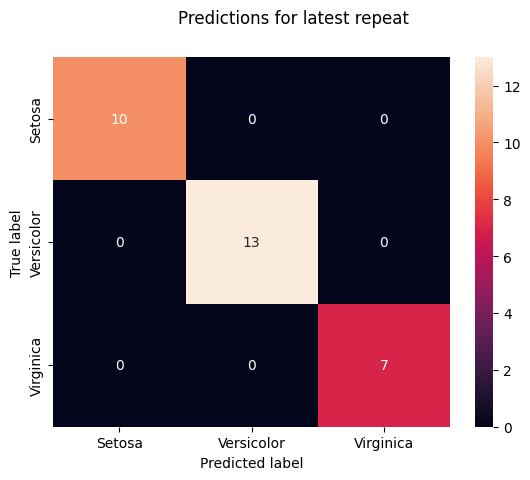

In [7]:
for i in range(times): # loops times times
    test_y, predict = Classification() # creates new model with new test and train data, predicts, returns results
    accuracy = accuracy_score(test_y, predict) # calculate accuracy based on results
    cumulative_acc += accuracy # add accuracy to cumulative accuracy
repeats += times # add times to repeats

print(f"{(cumulative_acc / repeats):.3f} Accuracy over {repeats} repeats")

# plot heatmap of results from [repeats] repeats, with [cum_accuracy / repeats] accuracy
Plot(test_y, predict)